In [4]:
!pip install simplejson

    100% |████████████████████████████████| 81kB 759kB/s ta 0:00:01
  Stored in directory: /Users/abhinavdwarkani/Library/Caches/pip/wheels/5d/1a/1e/0350bb3df3e74215cd91325344cc86c2c691f5306eb4d22c77
Successfully built simplejson


In [3]:
import tweepy          
import pandas as pd    
import numpy as np      
import twitter
from credentials import *   
from textblob import TextBlob
import re
from stop_words import get_stop_words
from collections import Counter
import simplejson as json
#from utils.PickleManager import *stop_words = get_stop_words('en')
#import os from django_setup.settings import compressFileDir,twitterFileDir

In [4]:
def userAuthentication():
    auth = tweepy.OAuthHandler('gODObwX686vkj4Wv4AgH0N2Qm', 'oyYRjPcnZOcZJdW3y1r407mj2HTymqtocxIDihnZ4xi0qGoUvT')
    auth.set_access_token('154894359-hPYK2KOyv0sfmW7RjSOUadHWLkFf5a5JcJDa8zzS', 'Uc0s8OOAAES66gBi9SLHk2sJ99rWKehVjgg7bQrT1wuMn')
    twitter_api = tweepy.API(auth)
    return twitter_api
twitter_api = userAuthentication()

query = "@claireperrymp"
msgs=[]
tQryData =  tweepy.Cursor(twitter_api.search, q=query).items(int(500))
for tweet in tQryData:
    msg = [tweet.text,len(tweet.text),tweet.id,tweet.favorite_count,tweet.retweet_count,tweet.source, tweet.source_url,tweet.created_at,tweet.user.profile_image_url,tweet.user.name,tweet.user.screen_name,tweet.geo,tweet.user.location,tweet.entities.get('hashtags')]
    msg = tuple(msg)
    msgs.append(msg)

df = pd.DataFrame(msgs)
df.columns = ['tweets','text_length','id','likes','retweets', 'source', 'url','created_at','image_url','author_name','author_screen_name','geo','location','hashtags']







In [5]:
df

,tweets,text_length,id,likes,retweets,source,url,created_at,image_url,author_name,author_screen_name,geo,location,hashtags
0,RT @Devizes4EU: Dear @claireperrymp \n\nIn a c...,140,1163200826497781761,0,1,Twitter for iPhone,http://twitter.com/download/iphone,2019-08-18 21:27:42,http://pbs.twimg.com/profile_images/1156307947...,jmshrrsn #FBPE 🇪🇺 #RevokeA50,jmshrrsn,None,EU,[]
1,@randombigbird @bodmansjaxs No chance of my MP...,140,1163170530050150402,1,0,Twitter Web App,https://mobile.twitter.com,2019-08-18 19:27:19,http://pbs.twimg.com/profile_images/1129433620...,Neil Munro,neilmunro49,None,SW France,[]
2,RT @MelbourneCarrie: @heidiallen75 Why aren’t ...,140,1163167472515780610,0,4,Twitter Web App,https://mobile.twitter.com,2019-08-18 19:15:10,http://pbs.twimg.com/profile_images/1159040757...,Raging Remaniac #FBPE #RevokeA50 #EUCollaborator,LianePougy,None,Frankfurt,[]
3,RT @MelbourneCarrie: @heidiallen75 Why aren’t ...,140,1163167086912450560,0,4,Twitter for iPhone,http://twitter.com/download/iphone,2019-08-18 19:13:38,http://pbs.twimg.com/profile_images/8232304053...,Andrea Esq. 🔶 #RevokeA50 #FBPE 🇬🇧♥️🇪🇺 🌍♻️,LibDemAndrea,None,"London, England",[]
4,RT @MelbourneCarrie: @heidiallen75 Why aren’t ...,140,1163165778574811137,0,4,Twitter for iPhone,http://twitter.com/download/iphone,2019-08-18 19:08:26,http://pbs.twimg.com/profile_images/1160698114...,Dave vid FBPE 🇪🇺🇬🇧,Dave_hampton,None,United Kingdom,[]
5,RT @MelbourneCarrie: @heidiallen75 Why aren’t ...,140,1163165579123073024,0,4,Twitter for Android,http://twitter.com/download/android,2019-08-18 19:07:39,http://pbs.twimg.com/profile_images/1000137509...,Peter Simms 🇪🇺🇬🇧🔶 pro-EU pro-FoM,peterrsimms,None,EU,[]
6,@heidiallen75 Why aren’t you on this list @cla...,140,1163165423820521475,18,4,Twitter for iPhone,http://twitter.com/download/iphone,2019-08-18 19:07:02,http://pbs.twimg.com/profile_images/1147107343...,Carrie Melbourne 🔶✨,MelbourneCarrie,None,United Kingdom,[]
7,oddly these have yet to be shared by the alleg...,140,1163155757409406976,0,0,Twitter for iPhone,http://twitter.com/download/iphone,2019-08-18 18:28:37,http://pbs.twimg.com/profile_images/9381052550...,District Heating,Districtheating,None,UK,[]
8,@GreenGreenwich Customers are given a heat exc...,138,1163153939359064065,0,0,Twitter for iPhone,http://twitter.com/download/iphone,2019-08-18 18:21:24,http://pbs.twimg.com/profile_images/9381052550...,District Heating,Districtheating,None,UK,[]
9,@IanDuncanHMG @jamiegreeneUK @beisgovuk @clair...,78,1163121305429954560,0,0,Twitter for iPad,http://twitter.com/#!/download/ipad,2019-08-18 16:11:43,http://pbs.twimg.com/profile_images/1075030427...,‘Mon nen,meallaidh,None,"eleven, eleven, eleVEN, ELEVEN",[]


In [5]:
import nltk

In [7]:
from nltk.corpus import stopwords 

In [8]:
from nltk.stem.porter import PorterStemmer

In [8]:
df1 = pd.read_csv("Tweets1.csv")

In [9]:
df1["Tweets"]=df1["Tweets"].astype(str)

In [10]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [11]:

df1["Tweets_clean"] = df1["Tweets"].apply(lambda x: clean_text(x))

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df1["sentiments"] = df1["Tweets"].apply(lambda x: sid.polarity_scores(x))
df1 = pd.concat([df1.drop(['sentiments'], axis=1),df1['sentiments'].apply(pd.Series)], axis=1)


In [13]:
df1.groupby('Useful Complains/Not Useful Complains')['neg'].count()

Useful Complains/Not Useful Complains
0    161
1     38
Name: neg, dtype: int64

In [14]:

# add number of characters column
df1["nb_chars"] = df1["Tweets"].apply(lambda x: len(x))

# add number of words column
df1["nb_words"] = df1["Tweets"].apply(lambda x: len(x.split(" ")))

In [80]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [15]:
import gensim

In [16]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df1["Tweets_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df1 = df1["Tweets_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df1.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df1.columns]
df1 = pd.concat([df1, doc2vec_df1], axis=1)

In [96]:
df1.columns

Index(['Tweets', 'Useful Complains/Not Useful Complains', 'Useful/Useless',
       'Tweets_clean', 'neg', 'neu', 'pos', 'compound', 'nb_chars', 'nb_words',
       'doc2vec_vector_0', 'doc2vec_vector_1', 'doc2vec_vector_2',
       'doc2vec_vector_3', 'doc2vec_vector_4', 'word_arron_banks',
       'word_change', 'word_claireperrymp', 'word_climate', 'word_eu',
       'word_get', 'word_https', 'word_leave', 'word_like', 'word_markfielduk',
       'word_michaelgove', 'word_one', 'word_rt', 'word_set', 'word_think',
       'word_uk', 'word_would'],
      dtype='object')

In [17]:
df2=df1[df1['Useful Complains/Not Useful Complains']==1]

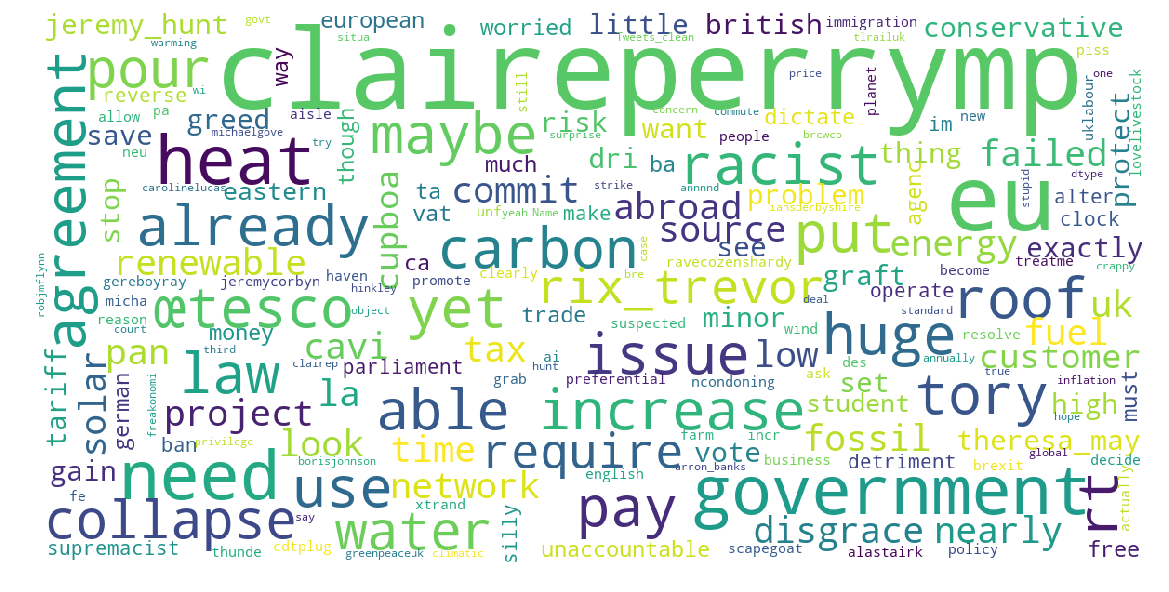

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df2["Tweets_clean"])
#view raw

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df1["Tweets_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df1.index
df1 = pd.concat([df1, tfidf_df], axis=1)

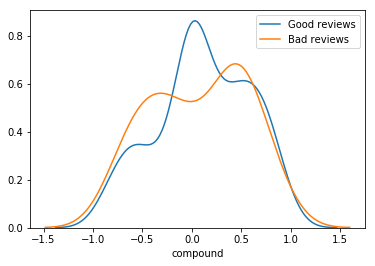

In [21]:

# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = df1[df1[ 'Useful Complains/Not Useful Complains'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [22]:
df1.columns

Index(['Tweets', 'Useful Complains/Not Useful Complains', 'Useful/Useless',
       'Tweets_clean', 'neg', 'neu', 'pos', 'compound', 'nb_chars', 'nb_words',
       'doc2vec_vector_0', 'doc2vec_vector_1', 'doc2vec_vector_2',
       'doc2vec_vector_3', 'doc2vec_vector_4', 'word_arron_banks',
       'word_change', 'word_claireperrymp', 'word_climate', 'word_eu',
       'word_get', 'word_https', 'word_leave', 'word_like', 'word_markfielduk',
       'word_michaelgove', 'word_one', 'word_rt', 'word_set', 'word_think',
       'word_uk', 'word_would'],
      dtype='object')

In [23]:
df1["Useful Complains/Not Useful Complains"]=df1["Useful Complains/Not Useful Complains"].astype(str)
df1["Useful/Useless"]=df1["Useful/Useless"].astype(int)

In [24]:
label = "Useful Complains/Not Useful Complains"
ignore_cols = [label, "Tweets", "Tweets_clean","Useful/Useless  "]
features = [c for c in df1.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1[features], df1[label], test_size = 0.40, random_state = 42)


In [141]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
0,Useful/Useless,0.111176
5,nb_chars,0.106677
6,nb_words,0.086258
9,doc2vec_vector_2,0.078247
7,doc2vec_vector_0,0.069710
1,neg,0.067374
8,doc2vec_vector_1,0.063925
11,doc2vec_vector_4,0.055715
4,compound,0.047725
2,neu,0.047676


In [142]:
from sklearn import metrics

In [143]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8625


In [127]:
import xgboost as xgb

In [134]:
#xgb_param = model.get_xgb_params()
#xgb_param['num_class'] = 3
# cvresult = xgb.cv(xgb_param, ...)

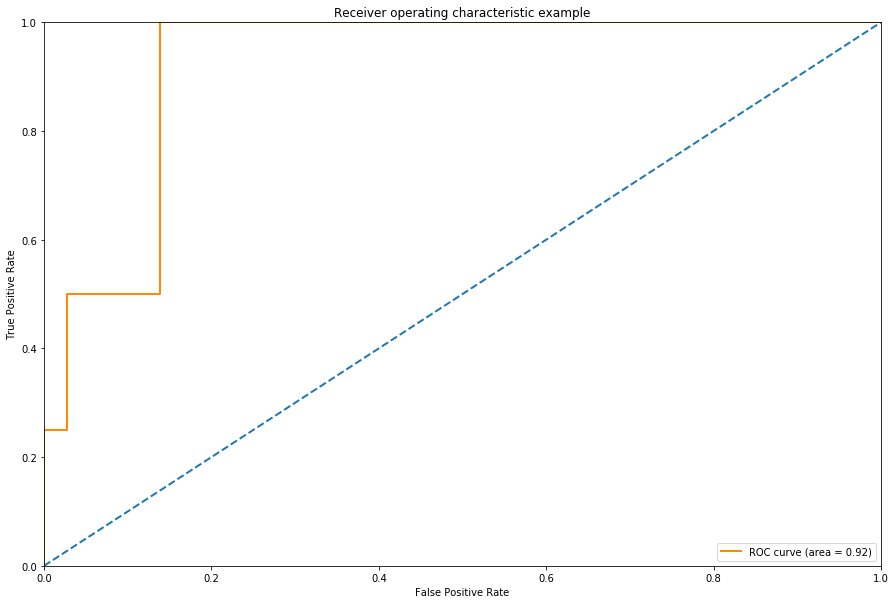

In [103]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [145]:
df1.shape

(199, 32)